[[5.00000000e-01 3.40155564e-04 4.30771154e-04 ... 5.01896142e-02
  1.58111619e-01 3.12646593e-01]
 [3.52546184e-05 5.00000000e-01 4.26442149e-04 ... 1.16130459e-01
  2.93882643e-01 1.64439946e-02]
 [6.59302673e-05 1.54014104e-04 5.00000000e-01 ... 2.66825827e-01
  3.37155191e-02 1.87039857e-03]
 ...
 [2.48486684e-03 3.37155191e-02 2.66825827e-01 ... 5.00000000e-01
  1.54014104e-04 1.04316880e-03]
 [2.02743243e-02 2.93882643e-01 1.16130459e-01 ... 4.26442149e-04
  5.00000000e-01 7.79234836e-03]
 [2.60773240e-01 2.20473585e-01 8.90788829e-02 ... 4.46929298e-02
  5.80760078e-02 5.00000000e-01]]
[[ 0.         -0.30854015 -0.13950998 ... -0.12723681 -0.20606565
   0.14291543]
 [ 0.08184394  0.         -0.23128594 ... -0.16833839  0.06088799
   0.08549521]
 [ 0.02698809  0.12697675  0.         ...  0.05085858  0.10952467
   0.03009426]
 ...
 [-0.02641539 -0.10952467 -0.05085858 ...  0.         -0.12697675
  -0.03031634]
 [-0.07255868 -0.06088799  0.16833839 ...  0.23128594  0.
  -0.09051304

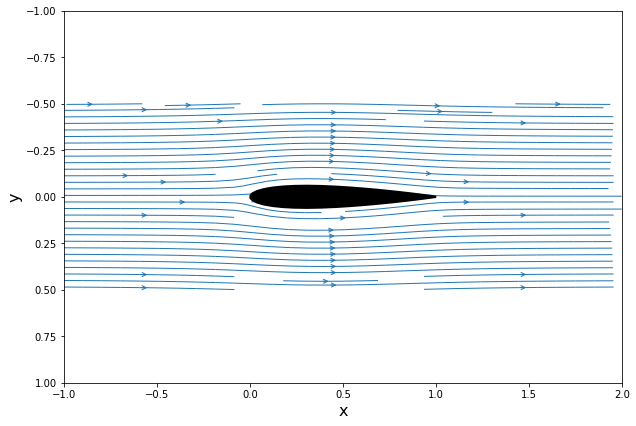

In [2]:
from steapy import *
import os
import numpy
from numpy import *
import math
from scipy import integrate, linalg
from matplotlib import pyplot
from pylab import *
import sympy
from sympy.abc import x, y

x=1
m=0.03
p=0.4
t=0.12
c=1

coordinates_symmetrical(x, t, c)
#coordinate = coordinates_cambered(x, m, p, t, c)

'''
Comment or Incomment the file path for the specific type of airfoil

'''
# load geometry from data file
naca_filepath = os.path.abspath('NACA'+'_'+'00'+str(int(t*100))+'.txt') #SYMMETRICAL
#naca_filepath = os.path.abspath('NACA'+'_'+str(int(m*100))+str(int(p*10))+str(int(t*100))+'.txt') #CAMBERED
with open(naca_filepath, 'r') as infile:
    x, y = numpy.loadtxt(infile, dtype=float, unpack=True)

# discretize geoemetry into panels
panels = define_panels(x, y, N=40)

# define freestream conditions
freestream = Freestream(u_inf=1.0, alpha=0.0)

#solve the source contribution
A_source = source_contribution_normal(panels)

#solve the vortex contribution
B_vortex = vortex_contribution_normal(panels)

#build LHS and RHS
A = build_singularity_matrix(A_source, B_vortex)
b = build_freestream_rhs(panels, freestream)

# solve for singularity strengths
strengths = numpy.linalg.solve(A, b)

# store source strength on each panel
for i , panel in enumerate(panels):
    panel.sigma = strengths[i]
    
# store circulation density
gamma = strengths[-1]

# tangential velocity at each panel center.
# compute_tangential_velocity(panels, freestream, gamma, A_source, B_vortex)

# surface pressure coefficient
# compute_pressure_coefficient(panels, freestream)

#define a mesh grid
nx, ny = 50, 50  # number of points in the x and y directions
x_start, x_end = -1.0, 2.0
y_start, y_end = -0.5, 0.5
X, Y = numpy.meshgrid(numpy.linspace(x_start, x_end, nx),
                      numpy.linspace(y_start, y_end, ny))

#compute the velocity field on the mesh grid
u, v = get_velocity_field(panels, freestream, X, Y)

#plot the velocity field
width = 10
pyplot.figure(figsize=(width, width))
#pyplot.figure(figsize=(20,20))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.streamplot(X, Y, u, v,
                 density=1, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.fill([panel.xc for panel in panels],
           [panel.yc for panel in panels],
           color='k', linestyle='solid', linewidth=2, zorder=3)
pyplot.axis('scaled', adjustable='box')
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.ylim(1,-1)
#pyplot.title('Streamlines around a NACA 0012 airfoil (AoA = ${}^o$)'.format(alpha), fontsize=16);
# savefig('Velo_NACA'+'_'+str(int(m*100))+str(int(p*10))+str(int(t*100))+'.pdf')
show()

# pts = []
# pts = list(pts)
# pts.append(x_start, randome)